In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv('final_nobroker.csv')

In [6]:
df.head()

,name,price,area,bedrooms,bathroom,balcony,parking,power_backup,bldg_age,flooring,furnishing,facing,floor,livability_score,transit_score,location,final_price
0,2 BHK For Sale in Bangalore South,50 Lacs,600,2,2,NaN,Bike and Car,None,>10 years,Marble/Granite,Semi,North,North,NaN,NaN,Bangalore,5000000
1,3 BHK For Sale in Jayanagar 3rd Block,5.25 Crores,"2,100",3,3,2.0,Bike and Car,Partial,>10 years,Vitrified Tiles,Unfurnished,West,West,NaN,7.6,Bangalore,52500000
2,"2 BHK For Sale in Armaan , Hombegowda Nagar",38 Lacs,825,2,2,NaN,Bike,None,3-5 years,NaN,Semi,East,02-May,NaN,NaN,Bangalore,3800000
3,"2 BHK For Sale in Adarsh Vihar, Suddagunte Palya",90 Lacs,"1,255",2,2,NaN,Bike and Car,None,>10 years,NaN,Semi,South,03-Jun,NaN,2.3,Bangalore,9000000
4,"3 BHK For Sale in Adarsh Vihar, Suddagunte Palya",1.3 Crores,"1,700",3,3,NaN,Bike and Car,None,>10 years,NaN,Semi,South,03-May,NaN,NaN,Bangalore,13000000


In [7]:
df.shape

(10071, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10071 entries, 0 to 10070
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10071 non-null  object 
 1   price             10071 non-null  object 
 2   area              10071 non-null  object 
 3   bedrooms          10071 non-null  int64  
 4   bathroom          10071 non-null  int64  
 5   balcony           5807 non-null   float64
 6   parking           10071 non-null  object 
 7   power_backup      10071 non-null  object 
 8   bldg_age          10070 non-null  object 
 9   flooring          6371 non-null   object 
 10  furnishing        10071 non-null  object 
 11  facing            10056 non-null  object 
 12  floor             10070 non-null  object 
 13  livability_score  0 non-null      float64
 14  transit_score     7425 non-null   float64
 15  location          10071 non-null  object 
 16  final_price       10071 non-null  int64 

In [9]:
df1= df.drop(['name', 'price', 'floor', 'livability_score'], axis=1)

In [10]:
df1.columns

Index(['area', 'bedrooms', 'bathroom', 'balcony', 'parking', 'power_backup',
       'bldg_age', 'flooring', 'furnishing', 'facing', 'transit_score',
       'location', 'final_price'],
      dtype='object')

#### Null values treatement

In [11]:
df1.flooring.unique()

array(['Marble/Granite', 'Vitrified Tiles', nan, 'Cement', 'Mosaic',
       'Wooden'], dtype=object)

In [12]:
df1.bldg_age.unique()

array(['>10 years', '3-5 years', '5-10 years', 'Newly Constructed',
       '1-3 years', 'Under Construction', nan], dtype=object)

In [13]:
# flooring

df1.loc[(df1.bldg_age == 'Under Construction'), 'flooring'] = 'Under Construction'

df1.flooring.fillna('Basic tiles', inplace = True) 

In [14]:
# balcony

df1.balcony.fillna(0, inplace= True)

In [15]:
# furnishing

df1.furnishing.unique()

array(['Semi', 'Unfurnished', 'Fully furnished', 'Not Available'],
      dtype=object)

In [16]:
df1.loc[df1.furnishing == 'Not Available']

,area,bedrooms,bathroom,balcony,parking,power_backup,bldg_age,flooring,furnishing,facing,transit_score,location,final_price
3348,900,2,0,0.0,-,None,NaN,Basic tiles,Not Available,NaN,NaN,Delhi,3000000


In [17]:
df1= df1.drop(df1[df1.furnishing== 'Not Available'].index)

In [18]:
df1.furnishing.fillna('Unfurnished', inplace= True)

In [19]:
# facing

df1.facing.unique()

array(['North', 'West', 'East', 'South', 'North-East', 'South-West',
       'South-East', "Don't Know", 'North-West', nan], dtype=object)

In [20]:
df1.facing.fillna("Dont't Know", inplace= True)

In [21]:
# transit score

df1.groupby('location')['transit_score'].mean()

location
Bangalore    5.291483
Chennai      5.967883
Delhi        3.949725
Faridabad    3.457234
Ghaziabad    3.261392
Gurgaon      1.600223
Hyderabad    4.059544
Mumbai       5.472858
Noida        3.827149
Pune         5.469837
Name: transit_score, dtype: float64

In [22]:
df1.loc[((df1.location == 'Bangalore') & (df1.transit_score.isnull())), 'transit_score'] = 5.3
df1.loc[((df1.location == 'Chennai') & (df1.transit_score.isnull())), 'transit_score'] = 6.0
df1.loc[((df1.location == 'Delhi') & (df1.transit_score.isnull())), 'transit_score'] = 3.9
df1.loc[((df1.location == 'Faridabad') & (df1.transit_score.isnull())), 'transit_score'] = 3.5
df1.loc[((df1.location == 'Ghaziabad') & (df1.transit_score.isnull())), 'transit_score'] = 3.3
df1.loc[((df1.location == 'Gurgaon') & (df1.transit_score.isnull())), 'transit_score'] = 1.6
df1.loc[((df1.location == 'Hyderabad') & (df1.transit_score.isnull())), 'transit_score'] = 4.1
df1.loc[((df1.location == 'Mumbai') & (df1.transit_score.isnull())), 'transit_score'] = 5.5
df1.loc[((df1.location == 'Noida') & (df1.transit_score.isnull())), 'transit_score'] = 3.8
df1.loc[((df1.location == 'Pune') & (df1.transit_score.isnull())), 'transit_score'] = 5.5

#### Treating categorical variables

In [23]:
df1['area']=df1['area'].str.replace(',','')
df1['area'] = pd.to_numeric(df1['area'])

In [24]:
df1.head(1)

,area,bedrooms,bathroom,balcony,parking,power_backup,bldg_age,flooring,furnishing,facing,transit_score,location,final_price
0,600,2,2,0.0,Bike and Car,None,>10 years,Marble/Granite,Semi,North,5.3,Bangalore,5000000


In [25]:
df1.facing.unique()

array(['North', 'West', 'East', 'South', 'North-East', 'South-West',
       'South-East', "Don't Know", 'North-West', "Dont't Know"],
      dtype=object)

In [26]:
park= {'None': 0, 'Bike': 1, 'Car': 2, 'Bike and Car': 3}
power= {'None': 0, 'Partial': 1, 'Full': 2}
age= {'Under Construction': 1, '>10 years': 2, '5-10 years': 3, '3-5 years': 4, '1-3 years': 5, 'Newly Constructed': 6}
furniture= {'Unfurnished': 0, 'Semi': 1, 'Fully furnished': 2}

df1['parking']= df1['parking'].map(park)
df1['power_backup']= df1['power_backup'].map(power)
df1['bldg_age']= df1['bldg_age'].map(age)
df1['furnishing']= df1['furnishing'].map(furniture)

In [27]:
floor= {'Marble/Granite': 'Tiles', 'Vitrified Tiles': 'Tiles', 'Basic tiles': 'Tiles',
       'Mosaic': 'Tiles', 'Under Construction': 'Cement', 'Cement': 'Cement', 'Wooden': 'Wooden'}
face= {'North': 'North', 'West': 'West', 'East': 'East', 'South': 'South', 'North-East': 'North', 'South-West': 'South',
       'South-East': 'South', "Don't Know": 'Dont know', 'North-West': 'North', "Dont't Know": 'Dont know'}

df1['flooring']= df1['flooring'].map(floor)
df1['facing']= df1['facing'].map(face)

In [28]:
floor_1= pd.get_dummies(df1.flooring)
face_1= pd.get_dummies(df1.facing)
loc= pd.get_dummies(df1.location)

df2= pd.concat([df1, floor_1, face_1, loc], axis= 1)

In [29]:
df2= df2.drop(['flooring', 'facing', 'location'], axis=1)

In [30]:
df2.head()

,area,bedrooms,bathroom,balcony,parking,power_backup,bldg_age,furnishing,transit_score,final_price,...,Bangalore,Chennai,Delhi,Faridabad,Ghaziabad,Gurgaon,Hyderabad,Mumbai,Noida,Pune
0,600,2,2,0.0,3,0,2,1,5.3,5000000,...,1,0,0,0,0,0,0,0,0,0
1,2100,3,3,2.0,3,1,2,0,7.6,52500000,...,1,0,0,0,0,0,0,0,0,0
2,825,2,2,0.0,1,0,4,1,5.3,3800000,...,1,0,0,0,0,0,0,0,0,0
3,1255,2,2,0.0,3,0,2,1,2.3,9000000,...,1,0,0,0,0,0,0,0,0,0
4,1700,3,3,0.0,3,0,2,1,5.3,13000000,...,1,0,0,0,0,0,0,0,0,0


#### EDA and Visualization

In [31]:
df1.describe()

,area,bedrooms,bathroom,balcony,parking,power_backup,bldg_age,furnishing,transit_score,final_price
count,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,1.007000e+04
mean,1216.051043,2.298014,2.302185,1.099603,2.212711,0.380933,3.393247,0.836743,4.416564,9.806992e+06
std,906.864325,0.918177,1.708858,1.249058,1.075664,0.722133,1.444533,0.673521,2.999903,1.258652e+07
min,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-10.000000,7.200000e+03
25%,680.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,3.300000,3.900000e+06
50%,1000.000000,2.000000,2.000000,1.000000,3.000000,0.000000,3.000000,1.000000,4.400000,6.200000e+06
75%,1440.000000,3.000000,3.000000,2.000000,3.000000,0.000000,5.000000,1.000000,6.200000,1.100000e+07
max,15840.000000,4.000000,75.000000,20.000000,3.000000,2.000000,6.000000,2.000000,9.100000,3.000000e+08


In [32]:
df1.corr()

,area,bedrooms,bathroom,balcony,parking,power_backup,bldg_age,furnishing,transit_score,final_price
area,1.000000,0.706702,0.742832,0.272279,0.154639,0.067761,0.051706,0.088748,-0.044733,0.561712
bedrooms,0.706702,1.000000,0.589935,0.243433,0.156029,0.052098,0.051207,0.079967,-0.089845,0.406335
bathroom,0.742832,0.589935,1.000000,0.278612,0.094320,0.032580,0.059036,0.068755,-0.028692,0.420357
balcony,0.272279,0.243433,0.278612,1.000000,0.163187,0.294858,0.160317,0.081781,-0.059342,0.079288
parking,0.154639,0.156029,0.094320,0.163187,1.000000,0.191533,0.184696,0.115383,-0.034184,0.087230
power_backup,0.067761,0.052098,0.032580,0.294858,0.191533,1.000000,0.132576,0.082343,-0.001203,0.058359
bldg_age,0.051706,0.051207,0.059036,0.160317,0.184696,0.132576,1.000000,-0.066811,-0.151459,-0.107461
furnishing,0.088748,0.079967,0.068755,0.081781,0.115383,0.082343,-0.066811,1.000000,0.010343,0.137742
transit_score,-0.044733,-0.089845,-0.028692,-0.059342,-0.034184,-0.001203,-0.151459,0.010343,1.000000,0.084283
final_price,0.561712,0.406335,0.420357,0.079288,0.087230,0.058359,-0.107461,0.137742,0.084283,1.000000


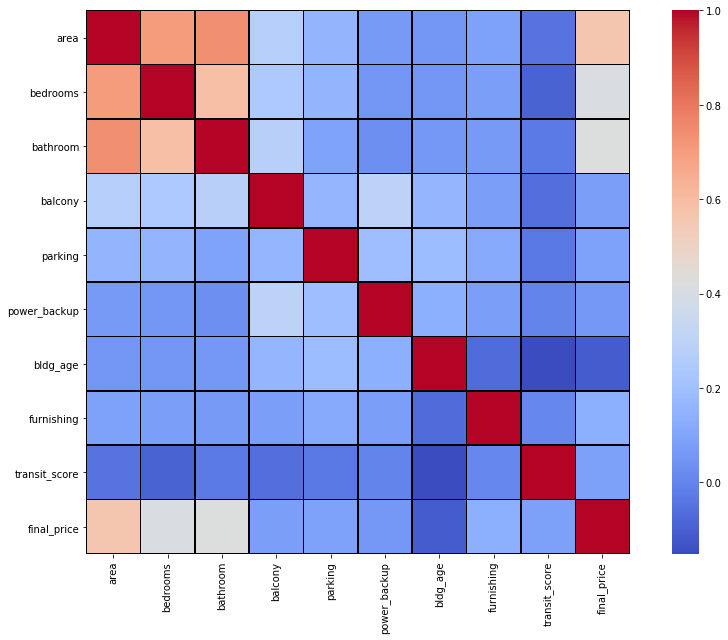

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
corr = df1.corr()
sns.heatmap(corr,square=True, ax=ax,cmap= 'coolwarm', linewidths=0.50, linecolor='black')
plt.show()

In [34]:
#### Checking for skewness

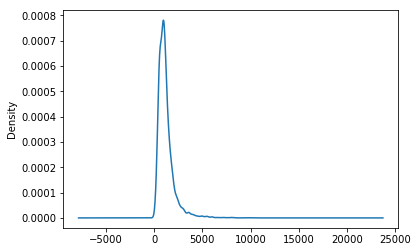

3.903914425734214

In [35]:
# area

df2.area.plot(kind= 'density')
plt.show()

df2.area.skew()

In [36]:
log_area= np.log(df2['area'])
log_area.skew()

0.09550556767891387

In [37]:
df2= df2.drop('area', axis= 1)
df2['area']= log_area

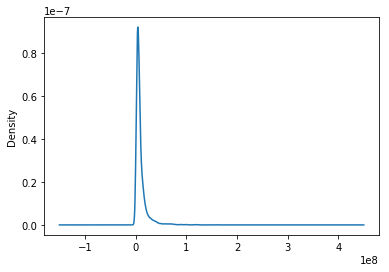

6.182675993660566

In [38]:
# final_price

df2.final_price.plot(kind= 'density')
plt.show()

df2.final_price.skew()

In [39]:
log_price= np.log(df2['final_price'])
log_price.skew()

0.37862766337348364

In [40]:
df2= df2.drop('final_price', axis= 1)
df2['price']= log_price

In [41]:
# Visualization

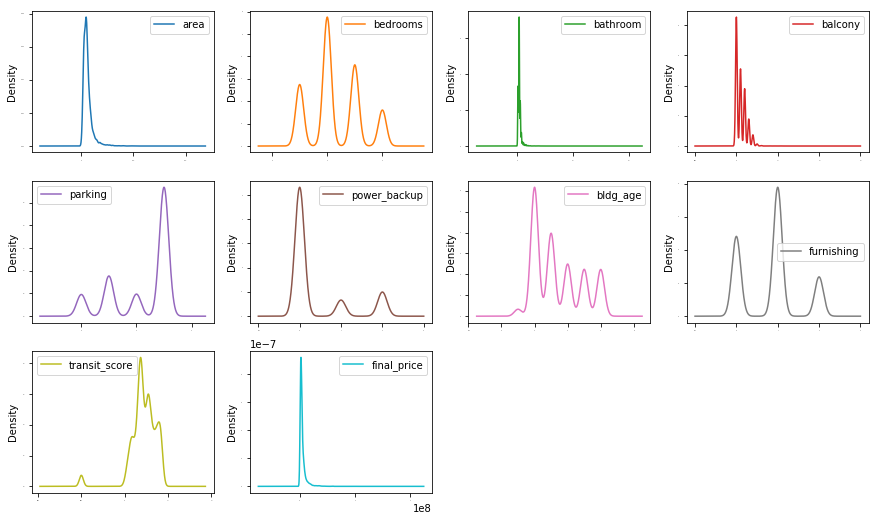

In [93]:
df1.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

In [94]:
df2

,bedrooms,bathroom,balcony,parking,power_backup,bldg_age,furnishing,transit_score,Cement,Tiles,...,Delhi,Faridabad,Ghaziabad,Gurgaon,Hyderabad,Mumbai,Noida,Pune,area,price
0,2,2,0.0,3,0,2,1,5.3,0,1,...,0,0,0,0,0,0,0,0,6.396930,15.424948
1,3,3,2.0,3,1,2,0,7.6,0,1,...,0,0,0,0,0,0,0,0,7.649693,17.776324
2,2,2,0.0,1,0,4,1,5.3,0,1,...,0,0,0,0,0,0,0,0,6.715383,15.150512
3,2,2,0.0,3,0,2,1,2.3,0,1,...,0,0,0,0,0,0,0,0,7.134891,16.012735
4,3,3,0.0,3,0,2,1,5.3,0,1,...,0,0,0,0,0,0,0,0,7.438384,16.380460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10066,2,2,0.0,3,0,6,0,8.5,0,1,...,0,0,0,0,0,0,0,1,6.791221,15.201805
10067,2,2,1.0,3,2,3,1,8.0,0,1,...,0,0,0,0,0,0,0,1,6.907755,15.520259
10068,1,1,1.0,3,0,2,1,8.7,0,1,...,0,0,0,0,0,0,0,1,6.272877,14.946913
10069,2,2,0.0,3,2,2,1,6.4,0,1,...,0,0,0,0,0,0,0,1,6.907755,15.907375


#### Scaling

In [42]:
X= df2.drop('price', axis= 1)
y= df2.price

In [96]:
# Scaling

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler= StandardScaler()

In [99]:
X_tf= scaler.fit_transform(X)

#### Train test split

In [43]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test= train_test_split(X_tf, y, test_size= 0.2, random_state= 10)

#### Model 1 Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
model_1= LinearRegression()

In [105]:
model_1= model_1.fit(X_train, y_train)

In [106]:
train_pred1= model_1.predict(X_train)
test_pred1= model_1.predict(X_test)

In [107]:
rmse_train1= np.sqrt(mean_squared_error(y_train, train_pred1))
rmse_test1= np.sqrt(mean_squared_error(y_test, test_pred1))

print('RMSE on train :', rmse_train1)
print('RMSE on test :', rmse_test1)

RMSE on train : 0.4635274134241034
RMSE on test : 0.47089097081896375


In [108]:
r2_train1= model_1.score(X_train, y_train)
r2_test1= model_1.score(X_test, y_test)

print('R2 on train :', r2_train1)
print('R2 on test :', r2_test1)

R2 on train : 0.6790747350881391
R2 on test : 0.6846623834885501


#### Model 2 LASSO Regression

In [109]:
from sklearn.linear_model import Lasso

In [110]:
from sklearn.linear_model import LassoCV

In [111]:
import numpy as np
model = LassoCV(alphas = np.arange(0.0001, 1, 0.001) )
model.fit(X_train, y_train)
model.alpha_

0.0011

In [112]:
lasso = Lasso(alpha=0.0011)
model_2 = lasso.fit(X_train, y_train)

In [113]:
train_pred2= model_2.predict(X_train)
test_pred2= model_2.predict(X_test)

In [114]:
rmse_train2= np.sqrt(mean_squared_error(y_train, train_pred2))
rmse_test2= np.sqrt(mean_squared_error(y_test, test_pred2))

print('RMSE on train :', rmse_train2)
print('RMSE on test :', rmse_test2)

RMSE on train : 0.4635419800059743
RMSE on test : 0.4709435637333043


In [115]:
r2_train2= model_2.score(X_train, y_train)
r2_test2= model_2.score(X_test, y_test)

print('R2 on train :', r2_train2)
print('R2 on test :', r2_test2)

R2 on train : 0.6790545642958015
R2 on test : 0.6845919406411468


#### Model 3 KNN

In [86]:
from sklearn.neighbors import KNeighborsRegressor

In [88]:
model_3= KNeighborsRegressor()
model_3.fit(X_train, y_train)

KNeighborsRegressor()

In [89]:
train_pred3= model_3.predict(X_train)
test_pred3= model_3.predict(X_test)

In [90]:
rmse_train3= np.sqrt(mean_squared_error(y_train, train_pred3))
rmse_test3= np.sqrt(mean_squared_error(y_test, test_pred3))

print('RMSE on train :', rmse_train3)
print('RMSE on test :', rmse_test3)

RMSE on train : 0.42377621481804967
RMSE on test : 0.5398446401643312


In [91]:
r2_train3= model_3.score(X_train, y_train)
r2_test3= model_3.score(X_test, y_test)

print('R2 on train :', r2_train3)
print('R2 on test :', r2_test3)

R2 on train : 0.7317583475554381
R2 on test : 0.5855495245086617


In [92]:
# hyperparameter tuning

In [97]:
print(max(score, key=score.get), max(score.values()))
print(min(error, key=error.get), min(error.values()))

10 0.6031279631427531
1 0.9533267130089375


In [99]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,50)}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 8}

In [100]:
model_31= KNeighborsRegressor(n_neighbors= 8)
model_31.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [101]:
train_pred31= model_31.predict(X_train)
test_pred31= model_31.predict(X_test)

In [102]:
rmse_train31= np.sqrt(mean_squared_error(y_train, train_pred31))
rmse_test31= np.sqrt(mean_squared_error(y_test, test_pred31))

print('RMSE on train :', rmse_train31)
print('RMSE on test :', rmse_test31)

RMSE on train : 0.45448547210688656
RMSE on test : 0.5290946135850886


In [103]:
r2_train31= model_31.score(X_train, y_train)
r2_test31= model_31.score(X_test, y_test)

print('R2 on train :', r2_train31)
print('R2 on test :', r2_test31)

R2 on train : 0.6914730745220103
R2 on test : 0.6018912389836102


#### Model 3 Random Forest

In [45]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 10)

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
model_4= RandomForestRegressor()
model_4.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
train_pred4= model_4.predict(X_train)
test_pred4= model_4.predict(X_test)

In [47]:
rmse_train4= np.sqrt(mean_squared_error(y_train, train_pred4))
rmse_test4= np.sqrt(mean_squared_error(y_test, test_pred4))

print('RMSE on train :', rmse_train4)
print('RMSE on test :', rmse_test4)

RMSE on train : 0.16708320736193918
RMSE on test : 0.4519013769381585


In [48]:
r2_train4= model_4.score(X_train, y_train)
r2_test4= model_4.score(X_test, y_test)

print('R2 on train :', r2_train4)
print('R2 on test :', r2_test4)

R2 on train : 0.9583016694529329
R2 on test : 0.7095827666705027


In [49]:
model_4.feature_importances_

array([0.01528193, 0.02627423, 0.01974953, 0.02109598, 0.008365  ,
       0.03182394, 0.01848165, 0.07772436, 0.00238529, 0.00208341,
       0.00090818, 0.00844776, 0.0073389 , 0.00648885, 0.00667372,
       0.00616717, 0.00428056, 0.00283891, 0.00949682, 0.01461265,
       0.01084324, 0.0027565 , 0.0052804 , 0.12401473, 0.01904422,
       0.00213509, 0.54540697])

In [50]:
X_feature_names= df2.columns

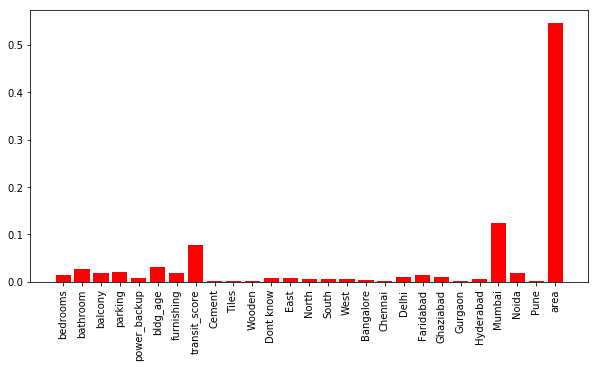

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
bar_rects = ax.bar(np.arange(27), model_4.feature_importances_, color='r', align='center')
ax.xaxis.set_ticks(np.arange(27))
ax.set_xticklabels(X_feature_names, rotation='vertical')
plt.show()

In [129]:
# hyperparameter tuning

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [119]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 6000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 200, num = 5)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 12, 14, 16, 18]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6, 8, 10]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [120]:
#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [121]:
rfr = RandomForestRegressor()

rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 10, n_jobs = -1)

rfr_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 50, 100, 150, 200],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 5, 10, 12, 14,
                                                              16, 18],
                                        'n_estimators': [1000, 1555, 2111, 2666,
                                                         3222, 3777, 4333, 4888,
                                                         5444, 6000]},
                   random_state=10, verbose=2)

In [123]:
rfr_random.best_params_

{'n_estimators': 3777,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [48]:
model_41 = RandomForestRegressor(**{'n_estimators': 3777,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False})

In [49]:
model_41.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5,
                      n_estimators=3777)

In [50]:
train_pred41= model_41.predict(X_train)
test_pred41= model_41.predict(X_test)

In [51]:
rmse_train41= np.sqrt(mean_squared_error(y_train, train_pred41))
rmse_test41= np.sqrt(mean_squared_error(y_test, test_pred41))

print('RMSE on train :', rmse_train41)
print('RMSE on test :', rmse_test41)

RMSE on train : 0.22687809072344164
RMSE on test : 0.4414122917930748


In [52]:
r2_train41= model_41.score(X_train, y_train)
r2_test41= model_41.score(X_test, y_test)

print('R2 on train :', r2_train41)
print('R2 on test :', r2_test41)

R2 on train : 0.9231156090747971
R2 on test : 0.7229080559090957


In [58]:
df2.to_csv('final_df.csv', index= False)

In [60]:
import pickle

In [61]:
file= 'RFR_nobroker.pkl'
pickle.dump(model_41, open(file, 'wb'))

In [53]:
import joblib

In [54]:
joblib.dump(model_41, 'rfr.pkl')

['rfr.pkl']

In [62]:
X.columns

Index(['bedrooms', 'bathroom', 'balcony', 'parking', 'power_backup',
       'bldg_age', 'furnishing', 'transit_score', 'Cement', 'Tiles', 'Wooden',
       'Dont know', 'East', 'North', 'South', 'West', 'Bangalore', 'Chennai',
       'Delhi', 'Faridabad', 'Ghaziabad', 'Gurgaon', 'Hyderabad', 'Mumbai',
       'Noida', 'Pune', 'area'],
      dtype='object')

In [63]:
len(X.columns)

27

In [66]:
def predict_price(flooring, facing, location, area, bedroom, bathroom, balcony, parking, power, age, furnishing, transit):    
    floor_index = np.where(X.columns==flooring)[0][0]
    facing_index = np.where(X.columns==facing)[0][0]
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[26] = area
    x[0] = bedroom
    x[1] = bathroom
    x[2] = balcony
    x[3] = parking
    x[4] = power
    x[5] = age
    x[6] = furnishing
    x[7] = transit
    
    if floor_index >= 0:
        x[floor_index] = 1
        
        
    if facing_index >= 0:
        x[facing_index] = 1

    if loc_index >= 0:
        x[loc_index] = 1   
        
    prediction= model_41.predict([x])[0]
    prediction= np.exp(prediction)
    
    return int(prediction)

In [67]:
predict_price('Tiles', 'North', 'Delhi', 400, 1, 2, 2, 2, 1, 1, 1, 8.7)

16.466874878134576

In [68]:
a= np.exp(16.466874878134576)

In [69]:
int(a)

14173362